### Mushroom Edibility Prediction with Decision Tree
How likely is your mushroom going to kill you?
<p>Welcome to the wonderful (and sometimes wily!) world of mushrooms! 
<p>These magical fungi come in all shapes, sizes, and colors—and while some add delicious umami flavors, others might sent you to the hospital!
<p>But fear not, fellow fungi explorer! 
<p>In this analysis, we’re here to separate the tasty treats from the toxic terrors. 
<p>Whether you're foraging in the forest or just curious, we'll break down the key signs to watch for so you can keep your mushroom-loving adventures delicious and safe.

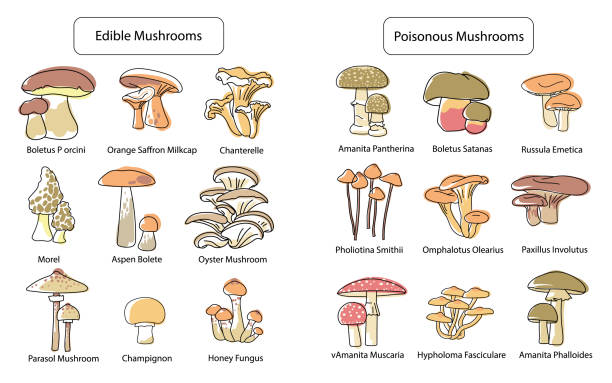

The dataset came from [UC Irvine Mushroom Dataset](https://archive.ics.uci.edu/dataset/73/mushroom). 
<p>Our goal is to develop a model that can classify mushrooms's edibility using the set of physical attributes provided in the dataset.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score


Step 1: We will load the data set and prepare them for visualization.

In [31]:
mushroom = pd.read_csv('agaricus-lepiota.data')
mushroom

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [32]:
missing_data = mushroom.isna().mean() * 100
missing_data

p      0.0
x      0.0
s      0.0
n      0.0
t      0.0
p.1    0.0
f      0.0
c      0.0
n.1    0.0
k      0.0
e      0.0
e.1    0.0
s.1    0.0
s.2    0.0
w      0.0
w.1    0.0
p.2    0.0
w.2    0.0
o      0.0
p.3    0.0
k.1    0.0
s.3    0.0
u      0.0
dtype: float64

Step 1.1. We will add columns name and the actral cell input back into the table for easier understanding.

In [33]:
columns_name = [
    'edibility','cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',
    'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 
    'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring',
    'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type',
    'spore_print_color', 'population', 'habitat'
]

mushroom.columns = columns_name
mushroom

,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [34]:
column_map = {
    'edibility': {'e': 'ediable', 'p':'poisonous'},
    'cap_shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap_surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap_color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 
                  'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no bruises'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 
             'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill_attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill_spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill_size': {'b': 'broad', 'n': 'narrow'},
    'gill_color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 
                   'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 
                   'w': 'white', 'y': 'yellow'},
    'stalk_shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk_root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 
                   'r': 'rooted', '?': 'missing'},
    'stalk_surface_above_ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk_surface_below_ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk_color_above_ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 
                               'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk_color_below_ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 
                               'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil_type': {'p': 'partial', 'u': 'universal'},
    'veil_color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring_number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring_type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 
                  'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore_print_color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 
                          'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 
                  'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 
                'w': 'waste', 'd': 'woods'}
}

for column in mushroom.columns:
    if column in column_map:
        mushroom[column] = mushroom[column].replace(column_map[column])

mushroom


,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,ediable,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
1,ediable,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
2,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
3,ediable,convex,smooth,gray,no bruises,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
4,ediable,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,ediable,knobbed,smooth,brown,no bruises,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8119,ediable,convex,smooth,brown,no bruises,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8120,ediable,flat,smooth,brown,no bruises,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8121,poisonous,knobbed,scaly,brown,no bruises,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


Step 1.3. We can add predictive model imputation that uses machine learning models (Random Forest) to predict missing values based on other features in the dataset.
<p>But for now we will drop the column for stalk root, also veil_type only have one value, it will not be useful.

In [35]:
print((mushroom == 'missing').sum())


edibility                      0
cap_shape                      0
cap_surface                    0
cap_color                      0
bruises                        0
odor                           0
gill_attachment                0
gill_spacing                   0
gill_size                      0
gill_color                     0
stalk_shape                    0
stalk_root                  2480
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring         0
stalk_color_below_ring         0
veil_type                      0
veil_color                     0
ring_number                    0
ring_type                      0
spore_print_color              0
population                     0
habitat                        0
dtype: int64


In [36]:
mushroom = mushroom.drop(columns=['stalk_root','veil_type'])


In [38]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edibility                 8123 non-null   object
 1   cap_shape                 8123 non-null   object
 2   cap_surface               8123 non-null   object
 3   cap_color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill_attachment           8123 non-null   object
 7   gill_spacing              8123 non-null   object
 8   gill_size                 8123 non-null   object
 9   gill_color                8123 non-null   object
 10  stalk_shape               8123 non-null   object
 11  stalk_surface_above_ring  8123 non-null   object
 12  stalk_surface_below_ring  8123 non-null   object
 13  stalk_color_above_ring    8123 non-null   object
 14  stalk_color_below_ring  

Step 1.4. Let's visualize the frequency distribution of each categorical feature, colored by edibility to see how the categories relate to edibility.

In [39]:
categorical_columns = mushroom.select_dtypes(include=['object']).columns
new_categorical_columns = categorical_columns[categorical_columns != 'edibility']

new_categorical_columns


Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
       'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color',
       'ring_number', 'ring_type', 'spore_print_color', 'population',
       'habitat'],
      dtype='object')

In [40]:
unique_values = {col: mushroom[col].nunique() for col in categorical_columns}
for col, unique_count in unique_values.items():
    print(f"{col}: {unique_count} unique values")

edibility: 2 unique values
cap_shape: 6 unique values
cap_surface: 4 unique values
cap_color: 10 unique values
bruises: 2 unique values
odor: 9 unique values
gill_attachment: 2 unique values
gill_spacing: 2 unique values
gill_size: 2 unique values
gill_color: 12 unique values
stalk_shape: 2 unique values
stalk_surface_above_ring: 4 unique values
stalk_surface_below_ring: 4 unique values
stalk_color_above_ring: 9 unique values
stalk_color_below_ring: 9 unique values
veil_color: 4 unique values
ring_number: 3 unique values
ring_type: 5 unique values
spore_print_color: 9 unique values
population: 6 unique values
habitat: 7 unique values


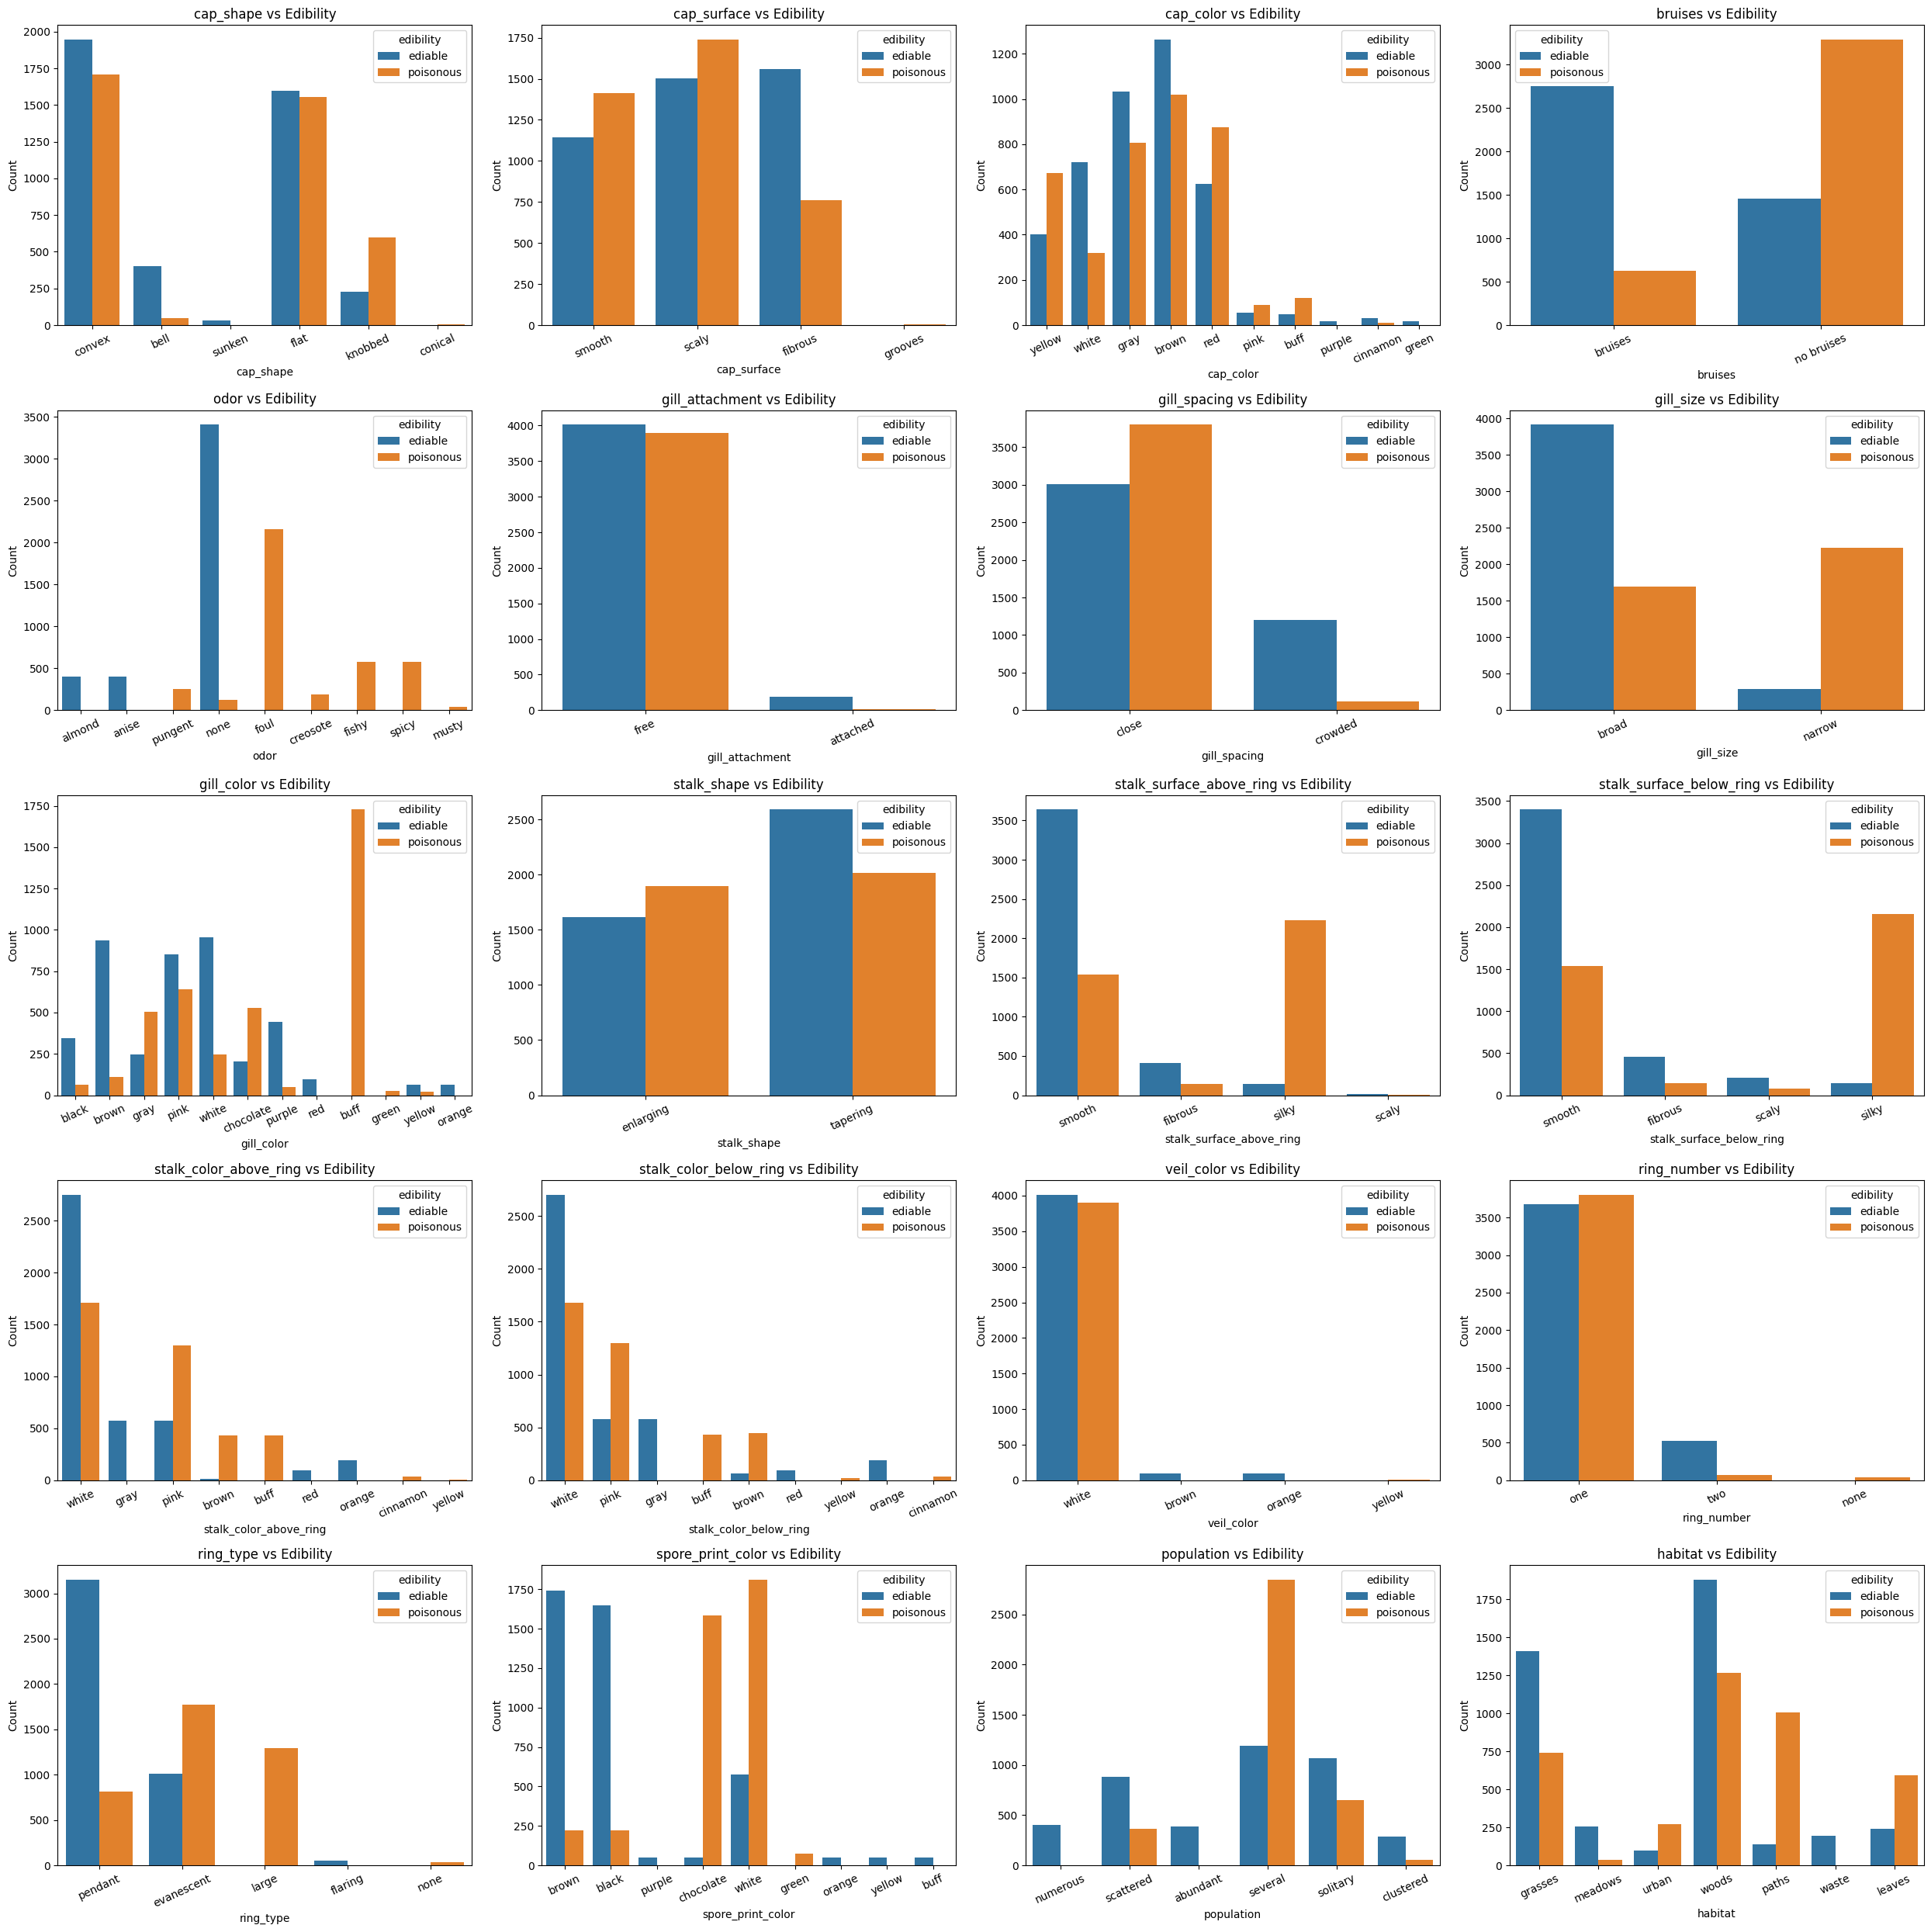

In [42]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25, 25))
axes = axes.flatten()

for i, column in enumerate(new_categorical_columns):
    sns.countplot(data=mushroom, x=column, hue='edibility', ax=axes[i])
    axes[i].set_title(f'{column} vs Edibility')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    
    for label in axes[i].get_xticklabels():
        label.set_rotation(25)

plt.tight_layout()
plt.show()


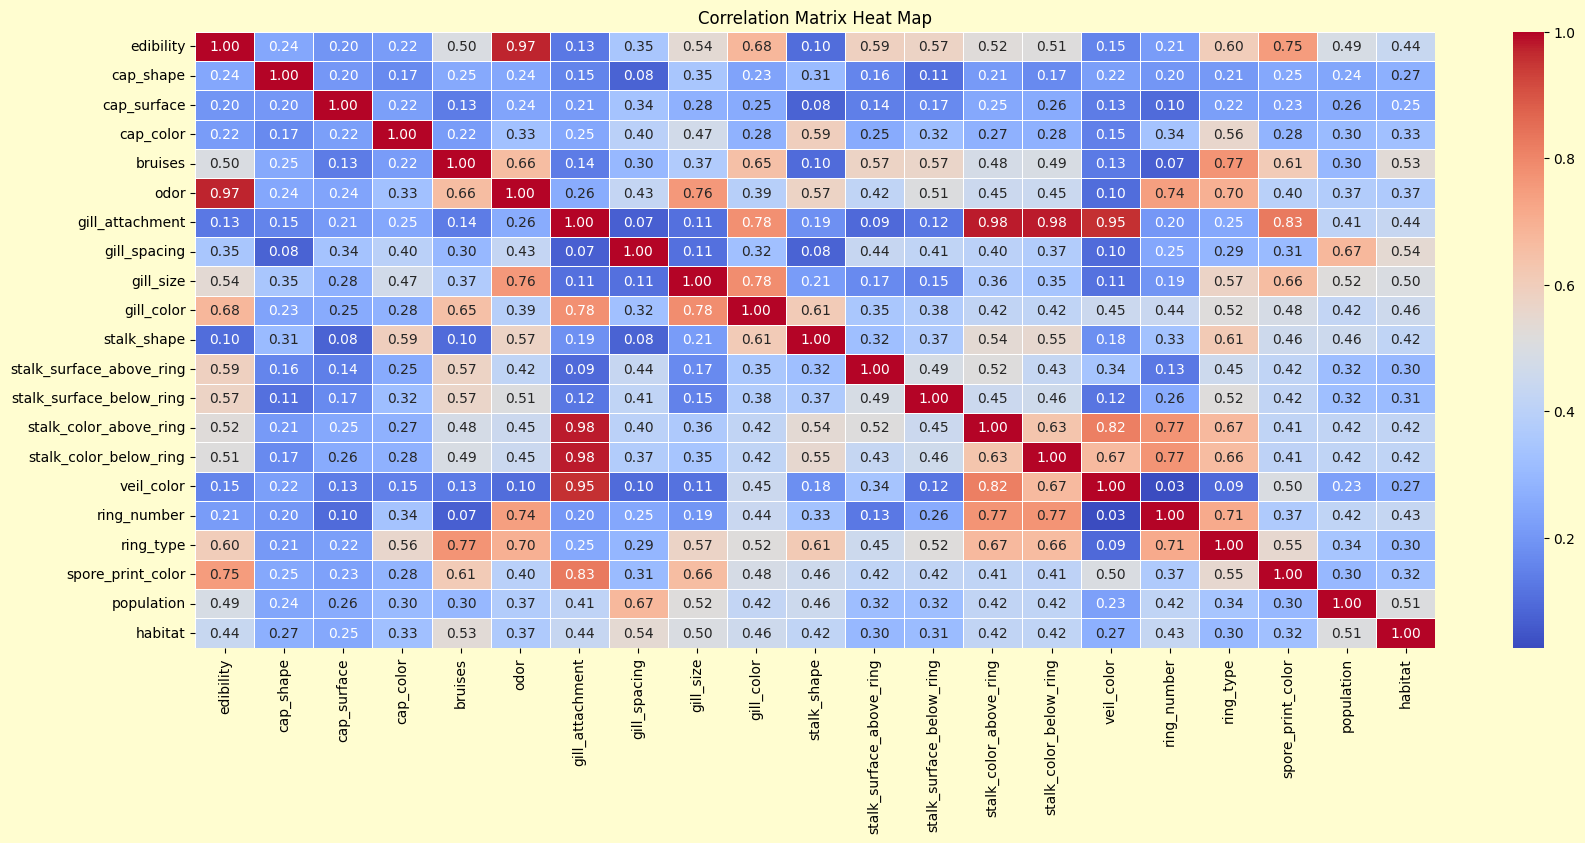

In [ ]:
from dython.nominal import associations

associations_df = associations(mushroom[:8123], nominal_columns='all', plot=False)
corr_matrix = associations_df['corr']

plt.figure(figsize=(20, 8))
plt.gcf().set_facecolor('#FFFDD0') 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heat Map')
plt.show()

Step 2. Let's prepare the data to bild the classification model for predicting mushroom edibility.

Step 2.1. We need to ensure teh dataset is preprossed and split into features, and the target (edibility). We will use 80% of data for training, and 20% for testing.

In [45]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_columns:
    print(f"Column: {column}")
    print("Original values -> Encoded values")
    original_values = mushroom[column].unique()
    encoded_values = label_encoder.fit_transform(mushroom[column])
    
    print(dict(zip(original_values, np.unique(encoded_values))))
    print("="*50)
    
    mushroom[column] = encoded_values

mushroom


Column: edibility
Original values -> Encoded values
{'ediable': 0, 'poisonous': 1}
Column: cap_shape
Original values -> Encoded values
{'convex': 0, 'bell': 1, 'sunken': 2, 'flat': 3, 'knobbed': 4, 'conical': 5}
Column: cap_surface
Original values -> Encoded values
{'smooth': 0, 'scaly': 1, 'fibrous': 2, 'grooves': 3}
Column: cap_color
Original values -> Encoded values
{'yellow': 0, 'white': 1, 'gray': 2, 'brown': 3, 'red': 4, 'pink': 5, 'buff': 6, 'purple': 7, 'cinnamon': 8, 'green': 9}
Column: bruises
Original values -> Encoded values
{'bruises': 0, 'no bruises': 1}
Column: odor
Original values -> Encoded values
{'almond': 0, 'anise': 1, 'pungent': 2, 'none': 3, 'foul': 4, 'creosote': 5, 'fishy': 6, 'spicy': 7, 'musty': 8}
Column: gill_attachment
Original values -> Encoded values
{'free': 0, 'attached': 1}
Column: gill_spacing
Original values -> Encoded values
{'close': 0, 'crowded': 1}
Column: gill_size
Original values -> Encoded values
{'broad': 0, 'narrow': 1}
Column: gill_color
O

,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,2,3,9,0,0,1,0,0,0,...,3,3,7,7,2,1,4,1,2,0
1,0,0,3,8,0,1,1,0,0,1,...,3,3,7,7,2,1,4,1,2,2
2,1,2,2,8,0,7,1,0,1,1,...,3,3,7,7,2,1,4,0,3,4
3,0,2,3,3,1,6,1,1,0,0,...,3,3,7,7,2,1,0,1,0,0
4,0,2,2,9,0,0,1,0,0,1,...,3,3,7,7,2,1,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,4,3,0,1,6,0,0,0,11,...,3,3,4,4,1,1,4,2,1,1
8119,0,2,3,0,1,6,0,0,0,11,...,3,3,4,4,0,1,4,2,4,1
8120,0,3,3,0,1,6,0,0,0,1,...,3,3,4,4,1,1,4,2,1,1
8121,1,4,2,0,1,3,1,0,1,2,...,3,2,7,7,2,1,0,7,4,1


In [46]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [47]:
X = mushroom.drop('edibility', axis=1)
Y = mushroom['edibility']

In [ ]:
X.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,2.491936,1.742829,4.324018,0.584513,4.788009,0.974147,0.161517,0.309122,4.730026,0.567278,2.498215,2.424843,5.446387,5.393204,1.965530,1.069432,2.291764,3.062415,3.644097,3.220977
std,0.901326,1.179619,3.444269,0.492836,1.983649,0.158705,0.368030,0.462160,3.342196,0.495483,0.814689,0.870377,2.143963,2.194666,0.242684,0.271080,1.801683,2.825277,1.252139,2.530833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,5.000000,5.000000,2.000000,1.000000,0.000000,1.000000,3.000000,0.000000
50%,2.000000,2.000000,3.000000,1.000000,6.000000,1.000000,0.000000,0.000000,4.000000,1.000000,3.000000,3.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,3.000000
75%,3.000000,3.000000,8.000000,1.000000,6.000000,1.000000,0.000000,1.000000,7.000000,1.000000,3.000000,3.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,6.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify= Y)


Step 2.2. We will use decision tree, and random forest. Why 42? Well, it is the Answer to the Ultimate Question of Life, the Universe, and Everything.

In [70]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}
model_results = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    Y_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, Y_proba)
    
model_results[name] = {'accuracy': accuracy, 'roc_auc': roc_auc}
print(f"{name} - Test Set Results")
print(f"Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")
print(classification_report(Y_test, Y_pred))
print("=" * 50)

Decision Tree - Test Set Results
Accuracy: 1.0000, ROC-AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Step 3.1 Classification Analysis. We will test the cross validation value, and see what feature is most important for the decision tree. We will also plot a confusion matrix.

In [71]:
# Apply 5 k-fold cross-validation
for name, model in models.items():
    print(f"{name} - Cross-Validation Results")
    accuracy_cv = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    roc_auc_cv = cross_val_score(model, X, Y, cv=5, scoring='roc_auc')
    
    print(f"Mean CV Accuracy: {accuracy_cv.mean():.4f} ± {accuracy_cv.std():.4f}")
    print(f"Mean CV ROC-AUC: {roc_auc_cv.mean():.4f} ± {roc_auc_cv.std():.4f}")
    print("=" * 50)

Decision Tree - Cross-Validation Results
Mean CV Accuracy: 0.9499 ± 0.0645
Mean CV ROC-AUC: 0.9493 ± 0.0662


In [72]:
decision_tree = models['Decision Tree']
if hasattr(decision_tree, 'feature_importances_'):
    importances = decision_tree.feature_importances_
    indices = importances.argsort()[::-1]  
    print(f'Feature importance for Decision Tree:')
    for i in range(7):
        print(f'{X.columns[indices[i]]}: {importances[indices[i]]:.4f}')

Feature importance for Decision Tree:
spore_print_color: 0.5355
ring_number: 0.1687
gill_size: 0.1341
veil_color: 0.0416
gill_spacing: 0.0353
stalk_shape: 0.0295
odor: 0.0269


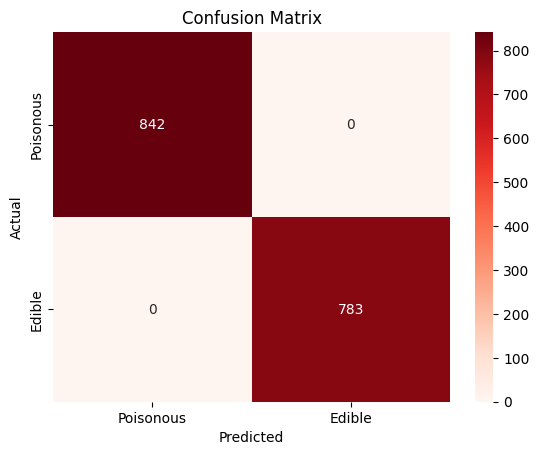

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Poisonous', 'Edible'], yticklabels=['Poisonous', 'Edible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [74]:
print(classification_report(Y_test, Y_pred,target_names=["Edible","Poisonous"]))


              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       842
   Poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

